# Day 29

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

inovation process $e_t$로는 주로 WN(White Noise)를 사용.



# 1차 Moving Average (MA) 모형

**MA 모형**은 백색 잡음의 현재 값과 과거 값 중 유한(finite)개의 값에 대한 선형 가중합(linear weighted summation)으로 나타나는 확률 과정을 말한다.

예를 들어 다음과 같이 백색 잡음의 현재 값 $e_t$부터 $q$ 스텝 지연된 $e_{t-q}$까지 $q+1$개 항의 선형 가중합으로 나타나는 경우 **차수 $q$인 MA 모형 (MA model of order $q$)** 혹은 더 간단하게 **$q$차 MA 모형**이라고 한다.

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

## MA(1) 모형

1차 MA 모형은 MA(1) 모형이라고 줄여 쓸 수 있다. MA(1) 모형은 다음과 같이 백색 잡음의 현재 값과 1스텝 지연된 과거 값의 합으로 나타난다.

$$ Y_t = e_t - \theta e_{t-1} $$

MA(1) 모형의 기댓값과 분산은 다음 성질을 만족한다.

$$ \mu = \text{E}[Y_t] = 0 $$

$$ \gamma_0 = \text{Var}[Y_t] = \sigma_e^2 (1 + \theta^2) $$

이 식에서 $\sigma_e^2$는 백색 잡음의 분산이다.

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ e_t - \theta e_{t-1} \right] \\
&=& \text{E} [ e_t ] - \theta \text{E} [ e_{t-1} ] \\
&=& 0 - \theta \cdot 0 \\
&=& 0\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ (e_t - \theta e_{t-1})^2 \right] \\
&=& \text{E} [ e_t^2 ] - 2 \theta \text{E} [ e_t e_{t-1} ] + \theta^2 \text{E} [ e_{t-1}^2 ] \\
&=& \sigma_e^2 - 2 \theta \cdot 0 + \theta^2 \sigma_e^2 \\
&=& \sigma_e^2 (1 + \theta^2)  \\
\end{eqnarray}
$$

MA(1) 모형의 자기 공분산은 다음과 같은 성질을 만족한다.
**$\gamma_1$ <- 한스텝 차이날 때**

$$ \gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = -\theta \sigma_e^2 $$

$$ \gamma_l = 0 \; \text{ for } l > 1 $$

(lag이 한스텝보다 더 차이나면 0이다)

$$
\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-1}]
&=& \text{E} \left[ (e_t - \theta e_{t-1})(e_{t-1} - \theta e_{t-2}) \right] \\
&=& \text{E} [ e_t e_{t-1} ] - \theta \text{E} [ e_t e_{t-2} ] - \theta \text{E} [ e_{t-1}^2 ] + \theta^2 \text{E} [ e_{t-1} e_{t-2} ] \\
&=& 0 - \theta \cdot 0 - \theta \sigma_e^2 + \theta^2 \cdot 0 \\
&=& - \theta \sigma_e^2   \\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Cov}[Y_t, Y_{t-2}]
&=& \text{E} \left[ (e_t - \theta e_{t-1})(e_{t-2} - \theta e_{t-3}) \right] \\
&=& \text{E} [ e_t e_{t-2} ] - \theta \text{E} [ e_t e_{t-3} ] - \theta \text{E} [ e_{t-1} e_{t-2} ] + \theta^2 \text{E} [ e_{t-1} e_{t-3} ] \\
&=& 0 - \theta \cdot 0 - \theta \cdot 0 + \theta^2 \cdot 0 \\
&=& 0  \\
\end{eqnarray}
$$

위 성질에서 MA(1) 모형의 자기 상관계수는 다음 성질을 만족한다.

$$ \rho_1 = - \dfrac{\theta}{1+\theta^2} $$

$$ \rho_k = 0 \; \text{ for } k > 1 $$

이 식을 사용하여 MA(1) 모형의 유일한 계수 $\theta$와 1스텝 지연 자기상관계수의 관계를 그래프로 나타내면 다음과 같다.

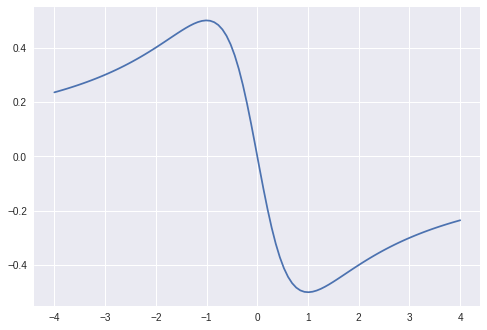

In [2]:
theta = np.linspace(-4, 4, 100)
rho = -theta / (1+theta**2)
plt.plot(theta, rho)
plt.show()

이 그래프에서 자기상관계수의 최대값과 최소값은 $0.5$, $-0.5$이며 이는 각각 $\theta=-1$, $\theta=1$일 때임을 알 수 있다. 즉 모형의 수식이 다음과 같은 경우이다.

$$ Y_t = e_t + e_{t-1} $$

$$ Y_t = e_t - e_{t-1} $$



## 1차 MA 모형의 시뮬레이션

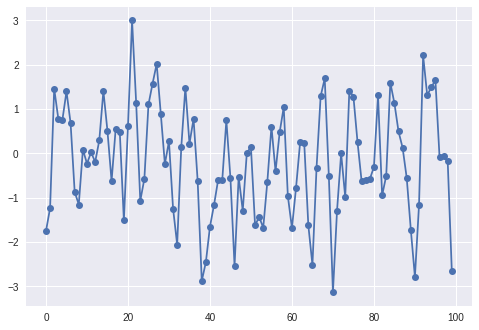

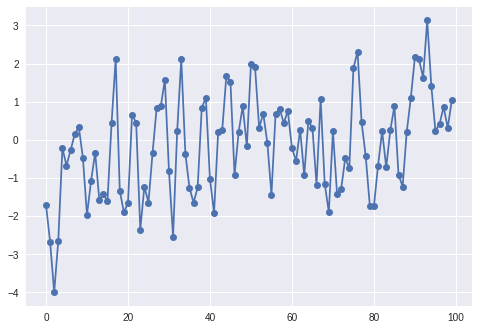

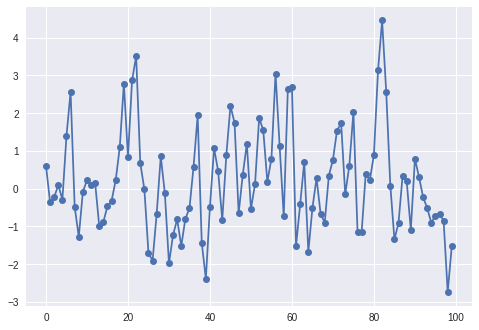

In [102]:
import statsmodels.api as sm
np.random.seed(100)
for i in range(3):
    theta1 = -0.9
    p1 = sm.tsa.ArmaProcess([1], [1, -theta1])
    y1 = p1.generate_sample(100)
    plt.plot(y1, 'o-')
    plt.show()

양수 음수 기준으로 머물러 있는 것을 볼 수 있다. 즉 바로 안바뀌고 머무르고 바뀌는 것에 중요하자.

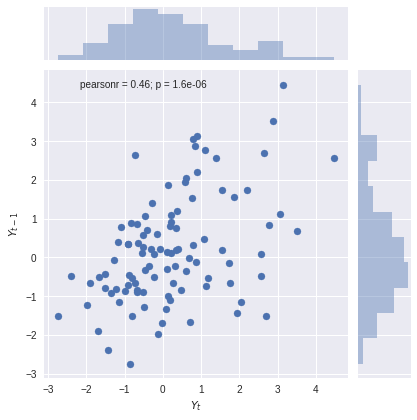

In [103]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

In [41]:
y1

array([ 0.60442354, -0.30260688, -0.31500715,  0.15495885, -0.33528864,
        1.4101226 ,  2.69594864, -0.34778934, -1.44701373, -0.05070801,
        0.1882837 ,  0.15306625,  0.10278941, -0.95267036, -1.02205614,
       -0.42057387, -0.40482311,  0.26393992,  1.08156472,  2.9046184 ,
        1.0015986 ,  2.80328943,  3.85666577,  0.71868397,  0.01589829,
       -1.73600265, -2.04952777, -0.73486758,  0.84296403, -0.03040322,
       -2.07791983, -1.33590594, -0.83646259, -1.57792573, -0.89458196,
       -0.51452944,  0.52279608,  2.05260875, -1.3421037 , -2.61732763,
       -0.51219604,  1.05255519,  0.58972669, -0.90179371,  0.87251763,
        2.30742641,  1.86215348, -0.58172031,  0.23840296,  1.34234445,
       -0.55611069,  0.08420184,  1.91577067,  1.69692835,  0.20384022,
        0.79386636,  3.1309025 ,  1.35976703, -0.82777986,  2.65125461,
        2.94303045, -1.48123597, -0.60738236,  0.83186377, -1.7159063 ,
       -0.63481687,  0.3370655 , -0.70072559, -0.93893035,  0.28

### Time Lag: 2

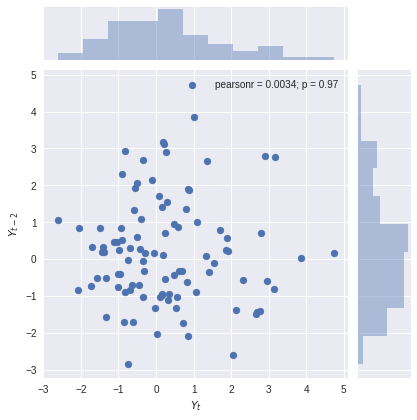

In [42]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()

선형성이 없다.

### Time Lag: 3

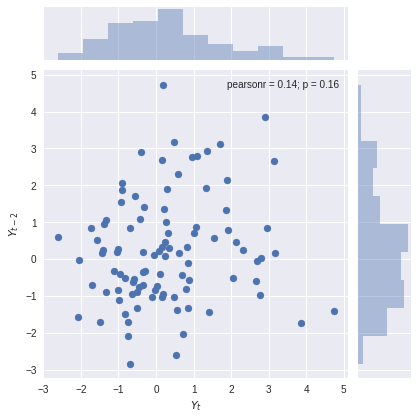

In [43]:
df = pd.DataFrame(np.c_[y1[:-3], y1[3:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()

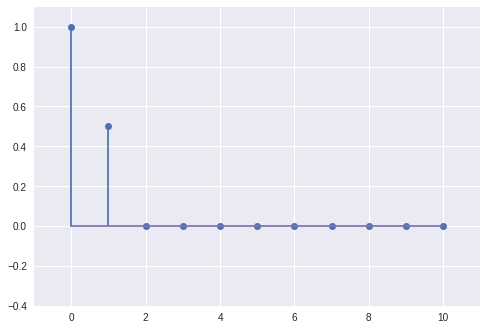

In [44]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.show()

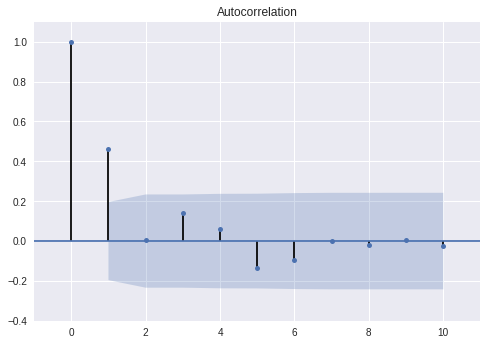

In [45]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.4, 1.1)
plt.show()

색칠된 부분은 confidence interval이다.

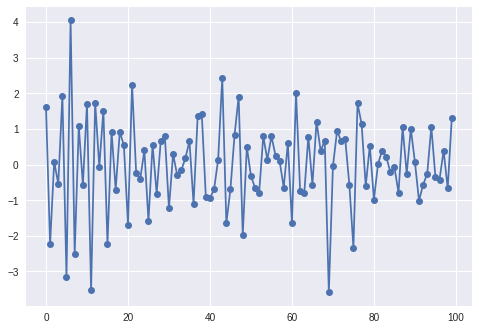

In [46]:
import statsmodels.api as sm
np.random.seed(1)
theta1 = 1
p2 = sm.tsa.ArmaProcess([1], [1, -theta1])
y2 = p2.generate_sample(100)
plt.plot(y2, 'o-')
plt.show()

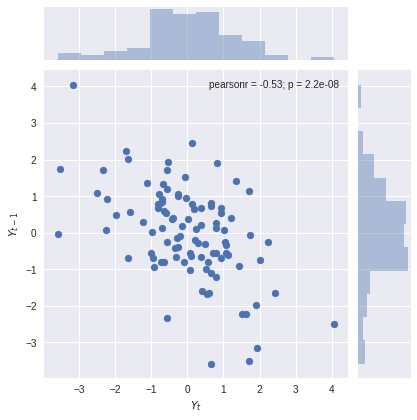

In [47]:
df = pd.DataFrame(np.c_[y2[:-1], y2[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

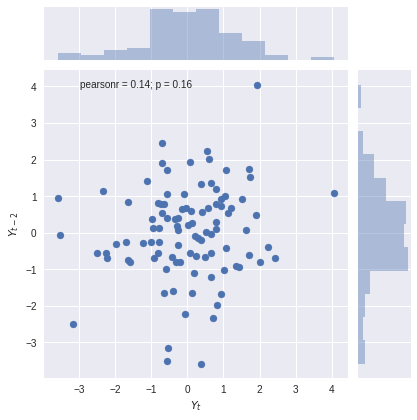

In [48]:
df = pd.DataFrame(np.c_[y2[:-2], y2[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()

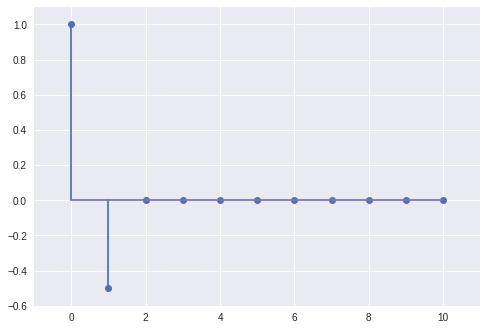

In [49]:
plt.stem(p2.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.6, 1.1)
plt.show()

어제 값에 대한 반작용이다. 어제 +였다면 오늘은 마이너스로 가는 경향이 있다.

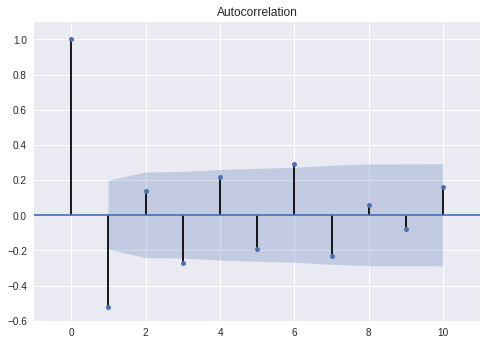

In [50]:
sm.graphics.tsa.plot_acf(y2, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.6, 1.1)
plt.show()

# 다차 Moving Average (MA) 모형

## 2차 MA 모형. MA(2)

2차 MA 모형 다른 표기법으로 MA(2) 모형은 다음과 같이 백색 잡음의 현재 값, 1스텝 지연된 과거 값, 그리고 2스텝 지연된 과거 값의 선형 가중합으로 나타난다.

$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} $$

MA(2) 모형의 기댓값과 분산은 다음 성질을 만족한다.

$$ \mu = \text{E}[Y_t] = 0 $$

$$ \gamma_0 = \text{Var}[Y_t] = \sigma_e^2 (1 + \theta_1^2 + \theta_2^2) $$

이 식에서 $\sigma_e^2$는 백색 잡음의 분산이다.

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] 
&=& \text{E} \left[ e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} \right] \\
&=& \text{E} [ e_t ] - \theta_1 \text{E} [ e_{t-1}  - \theta_2 \text{E} [ e_{t-2} ] \\
&=& 0 - \theta_1 \cdot 0 - \theta_2 \cdot 0 \\
&=& 0\\
\end{eqnarray}
$$

$$
\begin{eqnarray}
\text{Var}[Y_t] 
&=& \text{E} \left[ ( e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2})^2 \right] \\
&=& \text{E} [ e_t^2 ] + \theta_1^2 \text{E} [ e_{t-1}^2 ] + \theta_2^2 \text{E} [ e_{t-2}^2 ] - 2 \theta_1 \text{E} [ e_t e_{t-1} ] - 2 \theta_2 \text{E} [ e_t e_{t-2} ] - 2 \theta_1 \theta_2 \text{E} [ e_{t-1} e_{t-2} ] \\
&=& \sigma_e^2  + \theta_1^2 \sigma_e^2  + \theta_2^2 \sigma_e^2 - 2 \theta_1 \cdot 0  - 2 \theta_2 \cdot 0  - 2 \theta_1 \theta_2\cdot 0 \\
&=& \sigma_e^2 (1 + \theta_1^2 + \theta_2^2)  \\
\end{eqnarray}
$$

MA(2) 모형의 자기공분산은 다음과 같은 성질을 만족한다.

$$ \gamma_1 = \text{Cov}[Y_t, Y_{t-1}] = (-\theta_1 + \theta_1\theta_2) \sigma_e^2 $$

$$ \gamma_2 = \text{Cov}[Y_t, Y_{t-2}] = -\theta_2 \sigma_e^2 $$

$$ \gamma_k = 0 \; \text{ for } k > 2 $$

위 성질에서 MA(2) 모형의 자기상관계수는 다음 성질을 만족한다.

$$ \rho_1 = \dfrac{-\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2} $$

$$ \rho_2 = - \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} $$

$$ \rho_k = 0 \; \text{ for } k > 2 $$

이 식을 사용하여 MA(2) 모형의 계수 $\theta_1$, $\theta_2$와 1스텝 지연 자기상관계수의 관계를 그래프로 나타내면 다음과 같다.

max rho1: 0.706065178712
max rho2: 0.494977501023


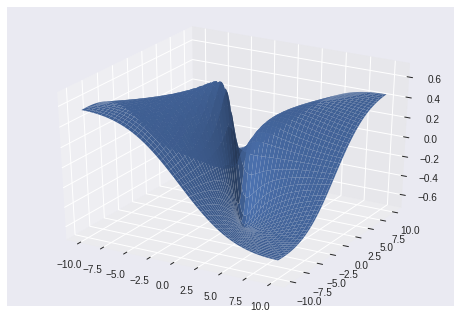

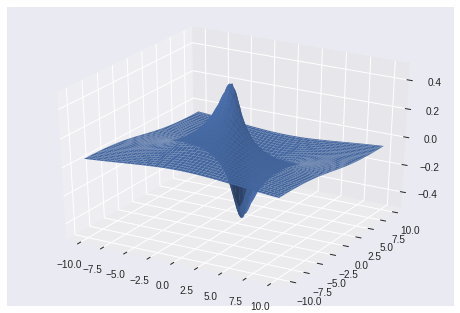

In [51]:
theta1, theta2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
rho1 = (-theta1 + theta1 * theta2)/(1 + theta1**2 + theta2**2)
rho2 = (-theta2)/(1 + theta1**2 + theta2**2)

print("max rho1:", np.max(rho1))
print("max rho2:", np.max(rho2))

from mpl_toolkits.mplot3d import Axes3D
f1 = plt.figure(1); ax1 = f1.gca(projection='3d')
surf1 = ax1.plot_surface(theta1, theta2, rho1)
f2 = plt.figure(2); ax2 = f2.gca(projection='3d')
surf2 = ax2.plot_surface(theta1, theta2, rho2)

## MA(2) 모형의 시뮬레이션

다음과 같은 MA(2) 모형의 예를 살펴보자

$$ Y_t = e_t - e_{t-1}  +0.6 e_{t-2} $$

앞의 성질을 이용하면 이 모형에서 생성된 시계열의 이론적인 자기상관계수는 다음과 같다.


$$ \rho_1 
= \dfrac{-\theta_1 + \theta_1 \theta_2}{1+\theta_1^2+\theta_2^2}
= \dfrac{-1 + 1\cdot(-0.6) \theta_2}{1+1^2+(-0.6)^2} = -0.678$$

$$ \rho_2 = - \dfrac{\theta_2}{1+\theta_1^2+\theta_2^2} = \dfrac{0.6}{1+1^2+(-0.6)^2} = 0.254 $$

$$ \rho_k = 0 \; \text{ for } k > 2 $$

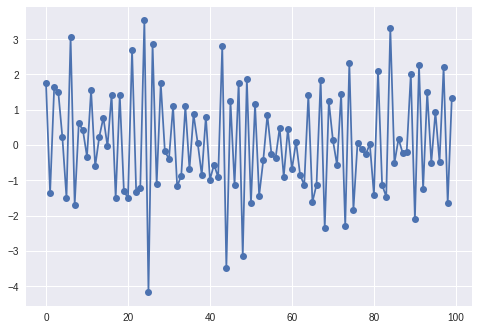

In [71]:
import statsmodels.api as sm
np.random.seed(0)
theta1 = 1
theta2 = -0.6
p1 = sm.tsa.ArmaProcess([1], [1, -theta1, -theta2])
y1 = p1.generate_sample(100)
plt.plot(y1, 'o-')

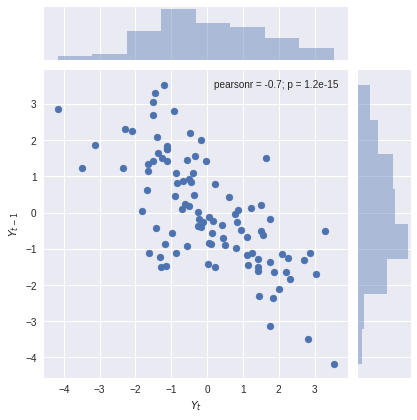

In [72]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)

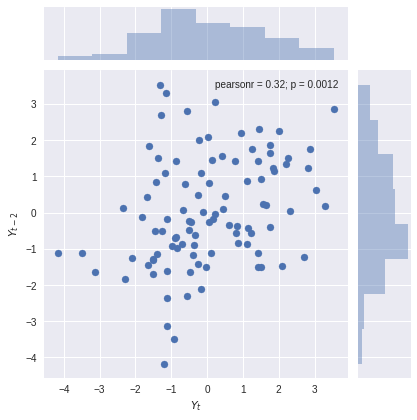

In [73]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)

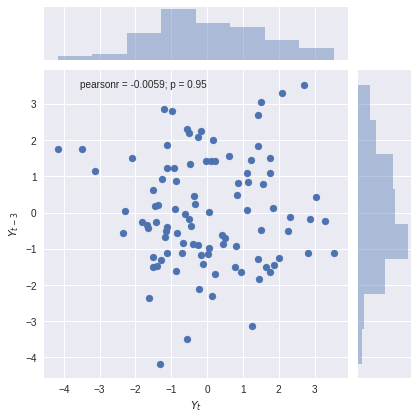

In [74]:
df = pd.DataFrame(np.c_[y1[:-3], y1[3:]])
df.columns = ["$Y_t$", "$Y_{t-3}$"]
sns.jointplot("$Y_t$", "$Y_{t-3}$", df)

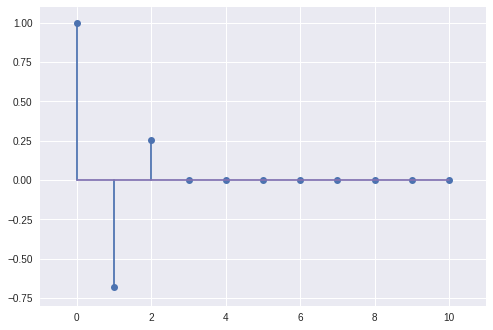

In [75]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.8, 1.1);

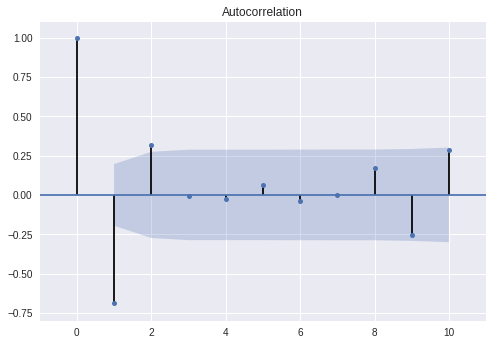

In [76]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.8, 1.1);

1, 2 lag은 확실하게 튀어나와있으므로 0은 아닐것이며 이후에는 2$\sigma$안에 들어온다.

## 일반적인 $q$차 MA(q) 모형

일반적인 $q$차의 MA(q)모형은 2차를 확장한 다음과 같은 형태이다.


$$ Y_t = e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

MA(q)의 기댓값은 0이며 자기공분산과 자기상관계수는 다음 성질을 만족한다.

$$ \gamma_0 = 1 + \theta_1^2 + \cdots  + \theta_q^2 $$

$$\rho_l = 
\begin{cases} 
\dfrac{-\theta_l + \theta_1\theta_{k-1}  + \theta_2\theta_{k-2} + \cdots + \theta_q\theta_{k-q}}{1 + \theta_1^2 + \cdots  + \theta_q^2} & \text{ for } k = 1, 2, \cdots, q \\ 
0 & \text{ for } k > q \\ 
\end{cases}
$$



자연계는 대부분 AR모델이며 경제지표같은경우 MA모델이 많다

# 1차 Autoregressive (AR) 모형

시계열 자료 중에는 시차가 증가해도 자기 상관계수가 비교적 오랫동안 0이 아닌 값으로 남아 있는 것을이 많다. 이러한 시계열에 MA 모형을 사용하면 차수가 너무 커진다. 이를 극복하기 위한 모형 중의 하나가 Autoregressive (AR) 모형이다.

**AR 모형은 백색 잡음의 현재값과 자기 자신의 과거값의 선형 가중합으로 이루어진 정상 확률 모형**이다.

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t $$

자기 자신의 과거 값을 사용하기 때문에 Autoregressive 라는 이름이 붙여졌다.

AR 모형은 임의의 계수 값을 가질 수 있는 MA 모형과 달리 정상 과정이 되기 위해서는 **계수의 값에 제한 조건**이 붙는다. 구체적인 제한 조건은 차수에 따라 달라진다.

AR 모형은 얼핏 보기에 일반 선형 확률 과정(general linear process)의 수식을 따르지 않는 것처럼 보이지만 일반 선형 확률 과정의 현태로 변환이 가능하다.


## AR(1) 모형

1차 AR 모형 즉, AR(1) 모형은 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값만의 가중합으로 이루어진 모형이다. 수식은 다음과 같다.

$$ Y_t = \phi Y_{t-1} + e_t $$

이 수식에서 계수 $\phi$는 다음 조건을 만족해야 한다. (y가 stationary한 채로 남으려면)

$$ -1 < \phi < 1 $$

AR(1) 모형은 다음과 같이 일반 선형 확률 과정의 형태로 바꿀 수 있다.

$$
\begin{eqnarray}
Y_t 
&=& \phi Y_{t-1} + e_t \\
&=& \phi \left( \phi Y_{t-2} + e_{t-1} \right) + e_t \\
&=& \phi^2 Y_{t-2} + \phi e_{t-1} + e_t \\
&=& \phi^2  \left( \phi Y_{t-3} + e_{t-2} \right)  + \phi e_{t-1} + e_t \\
&=& \phi^3 Y_{t-3} + \phi^2 e_{t-2}  + \phi e_{t-1} + e_t \\
&\vdots& \\
&=& e_t + \phi e_{t-1} + \phi^2 e_{t-2} + \phi^3 e_{t-3} + \cdots  \\
\end{eqnarray}
$$

AR(1) 모형의 기대값은 MA모형과 마찬가지로 0이다.

$$ \text{E}[Y_t] = 0 $$

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] = \mu 
&=& \text{E} \left[ \phi  Y_{t-1} - e_{t-1} \right] \\
&=& \phi\text{E} [ Y_{t-1} ] -\text{E} [ e_{t-1} ] \\
&=& \phi \mu -   0 \\ 
(1-\phi)\mu &=& 0 \\
\mu &=& 0 \; \text{ if } \phi \neq 1 \\
\end{eqnarray}
$$

AR(1) 모형의 분산은 다음과 같다.

$$ \gamma_0 = \dfrac{\sigma_e^2}{1-\phi^2} $$

이는 다음과 같이 증명할 수 있다.

우선 $e_t$는 과거의 값 $Y_{t-k}$ (for $k>1$)에 영향을 주지 않기 때문에 독립이다.  따라서

$$ \text{E}[e_tY_{t-k}] = \text{E}[e_t]\text{E}[Y_{t-k}] = 0 $$ 이다.

$$
\begin{eqnarray}
\text{Var}[Y_t] = \gamma_0 = \text{E}[Y_t^2] 
&=& \text{E} \left[ (\phi  Y_{t-1} - e_{t})^2 \right] \\
&=& \text{E} \left[ \phi^2  Y_{t-1}^2 - 2\phi Y_{t-1} e_{t-1} + e_{t}^2 \right] \\
&=& \phi^2\text{E} [ Y_{t-1}^2 ] - 2 \phi \text{E} [ Y_{t-1} e_{t} ] + \text{E} [ e_{t}^2 ] \\
&=& \phi^2 \gamma_0 - 0 + \sigma_e^2 \\
(1-\phi^2)\gamma_0 &=& \sigma_e^2 \\
\gamma_0 &=&  \dfrac{\sigma_e^2}{1-\phi^2} \; \text{ if } \phi^2 \neq 1 \\
\end{eqnarray}
$$


AR(1) 모형의 자기공분산은 다음과 같다.

$$ \gamma_k = \phi^k \dfrac{\sigma_e^2}{1-\phi^2} $$

이는 다음과 같이 증명한다.

$$
\begin{eqnarray}
\gamma_k &=& \text{E}[Y_{t-k} Y_t] \\
&=& \text{E} \left[ \phi  Y_{t-k} Y_{t-1} - Y_{t-k} e_{t} \right] \\
&=& \phi \text{E} \left[ Y_{t-k} Y_{t-1} \right] - \text{E} \left[ Y_{t-k} e_{t} \right] \\
&=& \phi \gamma_{k-1} \\
\end{eqnarray}
$$

$\gamma_0 =  \dfrac{\sigma_e^2}{1-\phi^2} $과 위 성질에 의해 귀납적으로 증명된다.


자기공분산으로부터 자기상관계수는 다음과 같다

$$ \rho_k = \dfrac{\gamma_k}{\gamma_0} = \phi^k $$

1과 -1사이의 여러가지 $\phi$에 대해 AR(1) 모형의 자기상관계수 함수 즉, ACF를 그리면 다음과 같다. 

* $\phi > 0$ 이면 ACF는 지수함수적으로 감소한다.
* $\phi < 0$ 이면 ACF는 부호를 바꿔가면서 (진동하면서) 지수함수적으로 감소한다.

(-1.1, 1.1)

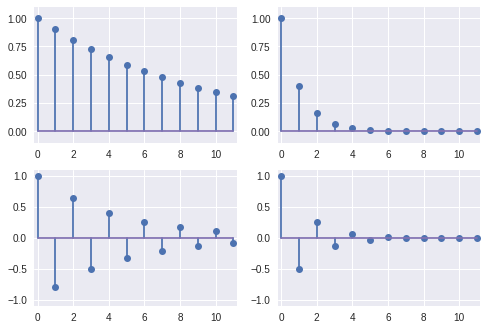

In [77]:
lag = np.arange(12)

plt.subplot(221)
acf = 0.9 **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-0.1, 1.1)

plt.subplot(222)
acf = 0.4 **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-0.1, 1.1)

plt.subplot(223)
acf = (-0.8) **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-1.1, 1.1)

plt.subplot(224)
acf = (-0.5) **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-1.1, 1.1)

앞의 그림에서 볼 수 잇듯이 $\phi$의 절대값이 1에 가까울 수록 자기상관계수의 감소 속도가 작아진다. 즉, 시차가 증가해도 상관계수가 크게 작아지지 않는다. 그럼 만약 $\phi$의 절대값이 1이거나 1보다 크다면 어떻게 될까?

$\phi$값의 크기가 1 이상이 되면 분산이 계속 증가하는 비정상 과정이 된다. $\phi=1$인 경우를 보자.


$$
\begin{eqnarray}
Y_t &=& Y_{t-1} + e_t \\
\text{Var}[Y_t] &=& \text{Var}[Y_{t-1} + e_t] \\
 &=& \text{Var}[Y_{t-1}] + \text{Var}[e_t]  \;\; (\text{independence})\\
\end{eqnarray}
$$

$$ \text{Var}[Y_t] > \text{Var}[Y_{t-1}] $$

AR(1) 모형의 경우 $\left| \phi \right| < 1$ 조건은 **정상상태 조건(stationarity condition)**이 된다.

## AR(1) 모형의 시뮬레이션

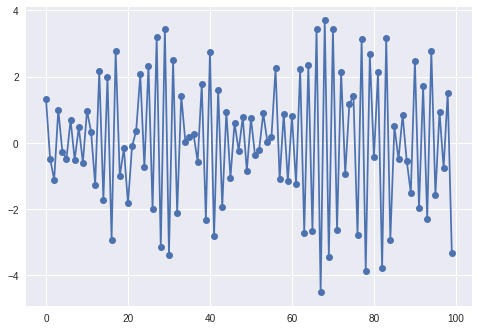

In [96]:
import statsmodels.api as sm
np.random.seed(10)
phi1 = -0.9
p1 = sm.tsa.ArmaProcess([1, -phi1],[1])
y1 = p1.generate_sample(100)
plt.plot(y1, 'o-')

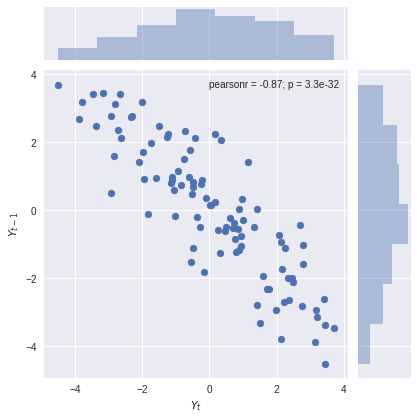

In [97]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)

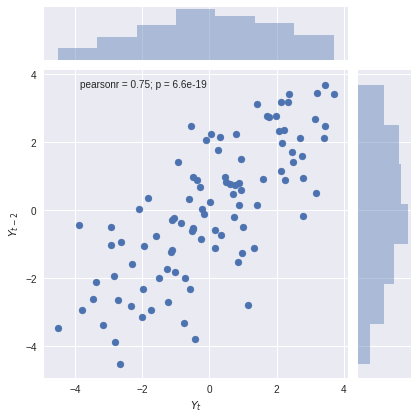

In [98]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)

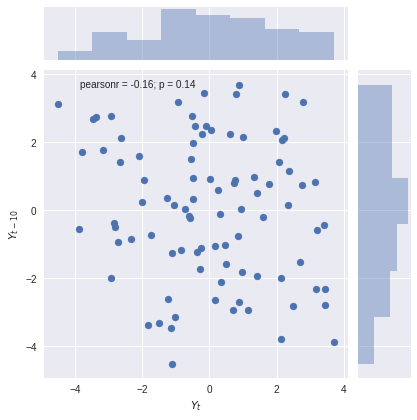

In [99]:
df = pd.DataFrame(np.c_[y1[:-10], y1[10:]])
df.columns = ["$Y_t$", "$Y_{t-10}$"]
sns.jointplot("$Y_t$", "$Y_{t-10}$", df)

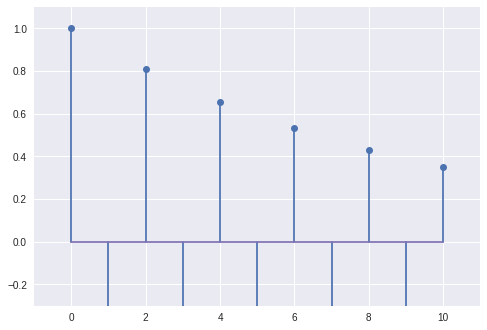

In [100]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.3, 1.1);

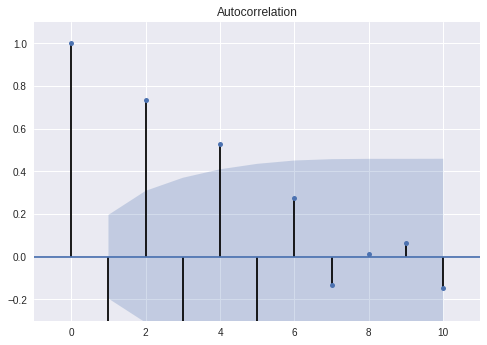

In [101]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.3, 1.1);

# 2차 Autoregressive (AR) 모형

## AR(2) 모형

2차 AR 모형 즉, AR(2) 모형은 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값, 그리고 2스텝 과거의 자기 자신의 값의 가중합으로 이루어진 모형이다. 수식은 다음과 같다.

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + e_t $$


**시간 지연 연산자(lag operator) $L$**을 사용하면 위 식은 다음과 같이 표현할 수 있다.


$$ Y_t = \phi_1 L Y_t + \phi_2 L^2 Y_t + e_t $$


$$ (1 - \phi_1 L  - \phi_2 L^2 ) Y_t =  e_t $$


이 식을 변환한 다음과 같은 식을 **특성 다항식(characteristic polynomial)**이라 하고 

$$ 1 - \phi_1 x - \phi_2 x^2 $$


특성 다항식이 0이 되는 방정식을 **특정 방정식(characteristic equation)**이라고 한다.

$$ 1 - \phi_1 x - \phi_2 x^2 = 0 $$


AR(2) 모형이 정상 과정을 나타내려면 **특성 방정식의 해의 크기(modulus)가 1보다 커야 한다**.

사실 이 정상상태 조건은 차수와 관계없이 임의의 AR(p)모형에 대해서도 적용된다.


AR(2) 모형의 경우 특성 방정식의 해는 다음과 같다.

$$
\dfrac{\phi_1 \pm \sqrt{\phi_1^2 + 4\phi_2}}{-2\phi_2}
$$

두 해가 모두 절대값이 1보다 커야 한다는 조건을 변환하면 다음 조건들을 동시에 만족하는 것과 같다.

$$ \phi_1 + \phi_2 < 1 $$

$$ \phi_2 - \phi_1 < 1 $$

$$ \left| \phi_2 \right| < 1 $$


AR(2) 모형의 자기상관계수는 다음과 같이 계산 가능하다. 

우선 AR(2)의 자기공분산은 다음 관계를 만족한다. 이 식을 **Yule-Walker 방정식**이라고 한다.

$$ \gamma_k = \phi_1\gamma_{k-1} + \phi_2\gamma_{k-2}$$

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\gamma_k = \text{E}[Y_t Y_{t-k}] 
&=& \text{E} \left[ (\phi_1Y_{t-1} + \phi_2Y_{t-1}  - e_{t})Y_{t-k} \right] \\
&=& \text{E} \left[ \phi_1Y_{t-1}Y_{t-k} \right] + \text{E} \left[ \phi_2Y_{t-1}Y_{t-k} \right] - \text{E} \left[ e_{t}Y_{t-k} \right] \\
&=& \phi_1 \gamma_{k-1} + \phi_2 \gamma_{k-2} 
\end{eqnarray}
$$


이 식을 $\gamma_0$로 나누면 자기상관계수에 대한 다음 식을 구할 수 있다. 
$$ \rho_k = \phi_1\rho_{k-1} + \phi_2\rho_{k-2}  $$

$\rho_0 = 1$과 $\rho_{-k} = \rho_k$를 이용하면

$$ \rho_1 = \phi_1\rho_{0} + \phi_2\rho_{-1} = \phi_1 + \phi_2 \rho_1  $$


$$ \rho_1 = \dfrac{\phi_1}{1- \phi_2}  $$

같은 방법으로 

$$ \rho_2 = \dfrac{\phi_2(1-\phi_2)+\phi_1^2}{1-\phi_2} $$

도 구할 수 있으며 

이를 $k$인 경우에 대해 확장하면 다음과 같다.

$$ \rho_k = \left( 1 + \dfrac{1+\phi_2}{1-\phi_2} \cdot k \right)\left( \dfrac{\phi_1}{2} \right)^k $$

여러가지 $\phi_1$, $\phi_2$에 대해 AR(2) 모형의 자기상관계수 함수 즉, ACF를 그리면 다음과 같은 특성을 보인다.

* 시차가 증가하면서 자기상관계수의 절대값은 지수함수적으로 감소한다.
* 진동할 수 있다. 진동 주파수는 계수에 따라 달라진다.

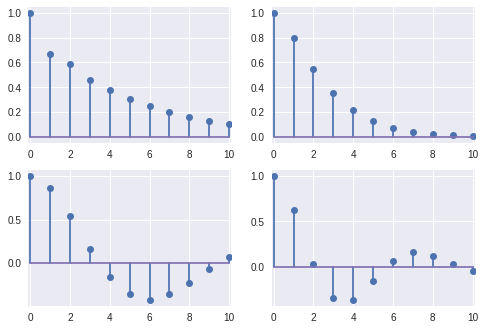

In [104]:
import statsmodels.api as sm

plt.subplot(221)
phi1 = 0.5; phi2 = 0.25;
p1 = sm.tsa.ArmaProcess([1, -phi1, -phi2],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(222)
phi1 = 1; phi2 = -0.25;
p1 = sm.tsa.ArmaProcess([1, -phi1, -phi2],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(223)
phi1 = 1.5; phi2 = -0.75;
p1 = sm.tsa.ArmaProcess([1, -phi1, -phi2],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(224)
phi1 = 1; phi2 = -0.6;
p1 = sm.tsa.ArmaProcess([1, -phi1, -phi2],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1);


## AR(2) 모형의 시뮬레이션

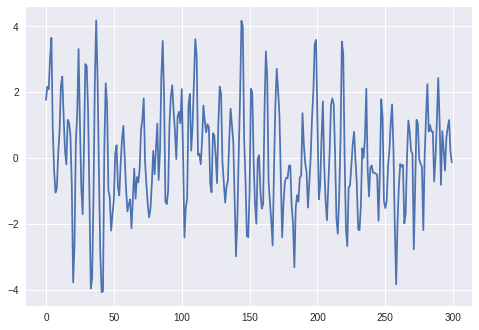

In [105]:
np.random.seed(0)
phi1 = 1; phi2 = -0.6;
p1 = sm.tsa.ArmaProcess([1, -phi1, -phi2],[1])
y1 = p1.generate_sample(300)
plt.plot(y1);

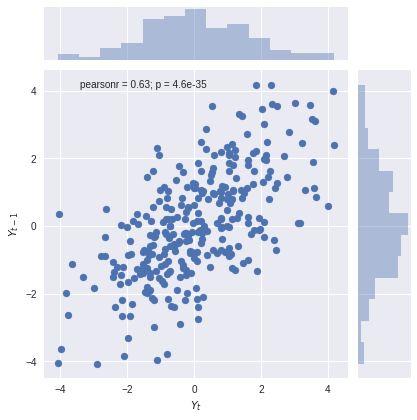

In [106]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df);

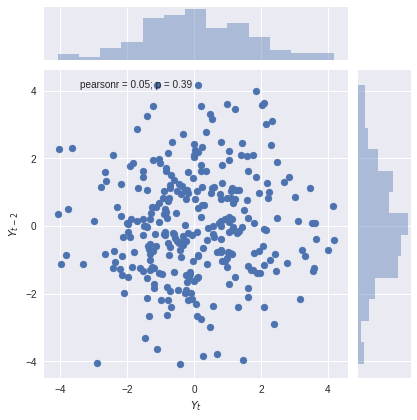

In [107]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)

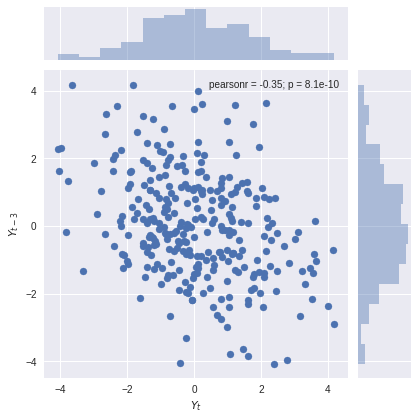

In [108]:
df = pd.DataFrame(np.c_[y1[:-3], y1[3:]])
df.columns = ["$Y_t$", "$Y_{t-3}$"]
sns.jointplot("$Y_t$", "$Y_{t-3}$", df)

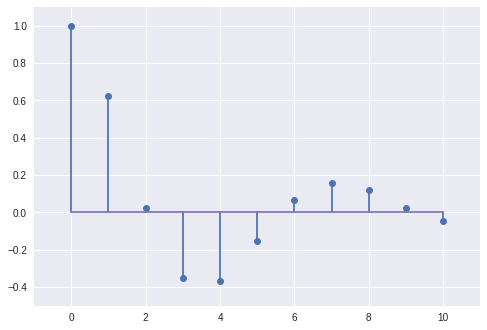

In [109]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.5, 1.1);

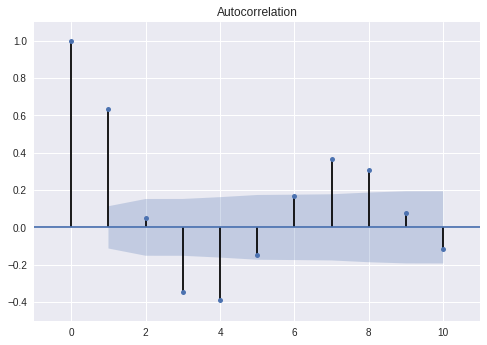

In [110]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.5, 1.1);

# ARMA 모형

ARMA(p,q) 모형은 AR(p) 모형과 MA(q) 모형의 특징을 모두 가지는 모형을 말한다. 

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t - \theta_1 e_{t-1} - \theta_2 e_{t-2} \cdots  - \theta_q e_{t-q} $$

ARMA(p,q) 모형의 정상상태 조건은 AR(p)모형의 정상상태 조건과 동일하다. 즉, MA(q) 부분을 구성하는 계수 $\theta$는 정상상태 조건에 영향을 미치지 않는다.

ARMA(p,q) 모형을 일반 선형 확률 과정의 형태로 바꾸면 다음과 같아진다.

$$
Y_t = e_t + \psi_1 e_{t-1} + \psi_2 e_{t-2} + \cdots
$$

$$
\begin{eqnarray}
\psi_1 &=& -\theta_1 + \phi_1 \\
\psi_2 &=& -\theta_2 + \phi_2 + \phi_1 \psi_1 \\
       &\vdots& \\
\psi_j &=& -\theta_j + \phi_p\psi_{j-p} + \phi_2 \psi_{p-1} + \cdots  + \phi_1 \psi_{j-1} &&
\end{eqnarray}
$$

ARMA(p,q) 모형의 자기상관계수도 다음과 같이 계수 $\phi$에 대한 방정식으로 주어진다.

$$ \rho_k = \phi_1 \rho_{k-1} + \cdots + \phi_p \rho_{k-p} $$

위 식을 사용하면 즉, Yule-Walker 연립 방정식을 사용하면 주어진 자기상관계수 함수에 대해 이를 만족하는 ARMA모형을 계산하는 것이 가능하다.

## ARMA(p,q) 모형의 시뮬레이션

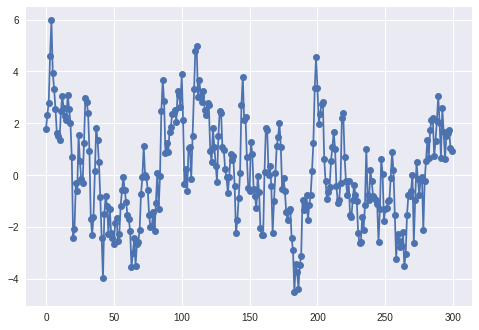

In [111]:
import statsmodels.api as sm
np.random.seed(0)
phi1 = 0.7
theta1 = -0.4
p1 = sm.tsa.ArmaProcess([1, -phi1],[1, -theta1])
y1 = p1.generate_sample(300)
plt.plot(y1, 'o-')

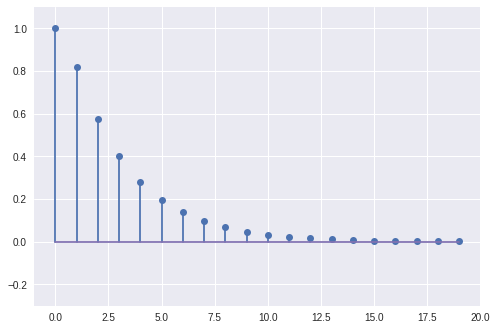

In [112]:
plt.stem(p1.acf(20))
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1);

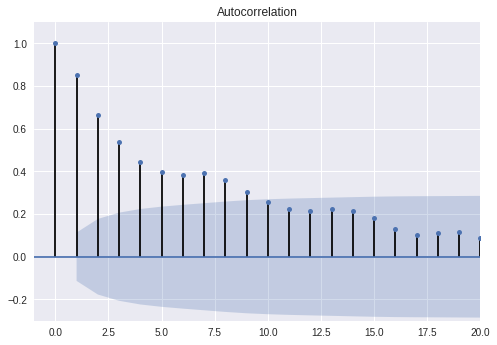

In [113]:
sm.graphics.tsa.plot_acf(y1, lags=20);
plt.xlim(-1, 20)
plt.ylim(-0.3, 1.1);

## 가역성 조건

임의의 AR(p)모형을 일반 선형 확률 과정으로 변환하였던 것 처럼 임의의 MA(p)모형도 무한 차원의 AR 모형으로 변환하는 것이 가능하다. 

MA 모형을 AR 모형으로 변환 하였을 때 이 **변환된 AR 모형이 정상상태 조건을 만족하면 원래의 MA 모형이 가역성 조건(invertibility condition)을 만족**한다고 한다.

주어진 자기상관계수 함수를 가지는 MA 모형은 복수개 있을 수 있지만 **가역성 조건을 만족하는 MA 모형은 단 하나만 존재**한다. 

# ARIMA 모형

시계열 $Y_t$을 차분(difference)한 결과로 만들어진 시계열 $ \nabla Y_t = Y_t - Y_{t-1} $이 ARMA 모형을 따르면 원래의 시계열 $Y_t$를 **ARIMA(Autoregressive Integrated Moving Average) 모형**이라고 한다.

만약 $d$번 차분한 후에야 시계열 $ \nabla^d Y_t$가 ARMA(p,q) 모형을 따른다면 적분 차수(order of integration)가 $d$인 ARIMA 모형으로 **ARIMA(p, d, q)**로 표기한다. $q=0$인 경우에는 ARI(p,d), $p=0$인 경우에는 IMA(d,q)로 표기한다.

In [122]:
import scipy as sp
y0 = sp.stats.norm.rvs(size=100)
df = pd.DataFrame({"y0":y0})
df.head()

,y0
0,0.785804
1,-0.057470
2,-0.391217
3,0.940918
4,0.405204


In [125]:
df["y1"] = df["y0"].diff()
df.head()

,y0,y1
0,0.785804,NaN
1,-0.057470,-0.843273
2,-0.391217,-0.333748
3,0.940918,1.332135
4,0.405204,-0.535714


In [127]:
df["y2"] = df["y1"].diff()
df.head()

,y0,y1,y2
0,0.785804,NaN,NaN
1,-0.057470,-0.843273,NaN
2,-0.391217,-0.333748,0.509526
3,0.940918,1.332135,1.665882
4,0.405204,-0.535714,-1.867848


## 단위근 특성

ARIMA(p, 1, q) 모형은 특성 방정식(characteristic equation)이 $x=1$이라는 단위근(unit root)를 가진다. 이 특성으로 인해 확률 과정이 ARIMA(p, 1, q)에 해당하지는 확인하는 검정 방법을 통틀어 **단위근 검정(unit root test)**이라고도 한다.

단위근 특성은 다음과 같이 확인한다. ARIMA(p,1,q) 모형을 차분한 값을 $W_t=Y_t-Y_{t-1}$라고 하자. $W_t$는 ARMA(p,q) 모형이므로 다음과 같이 표현할 수 있다.

$$ W_t = \phi_1 W_{t-1} + \phi_2 W_{t-2} + \cdots + \phi_p W_{t-p} + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$

이를 다시 원 시계열 $Y_t$로 표현하면,

$$ Y_t-Y_{t-1} = \phi_1 (Y_t-Y_{t-1}) + \phi_2 (Y_{t-1}-Y_{t-2}) + \cdots + \phi_p (Y_{t-p}-Y_{t-p-1}) + e_t - \theta_1 e_{t-1}  - \theta_2 e_{t-2} - \cdots  - \theta_q e_{t-q} $$


$$ Y_t = (1+\phi_1)Y_t+(\phi_2-\phi_1)Y_{t-1}+\cdots+(\phi_p-\phi_{p-1})Y_{t-p}-\phi_pY_{t-p-1}+e_t-\theta_1e_{t-1}-\theta_2 e_{t-2}-\cdots-\theta_q e_{t-q} $$

위 모형에 대한 특성 방정식은

$$ 1-(1+\phi_1)x-(\phi_2-\phi_1)x^2-\cdots-(\phi_p-\phi_{p-1})x^p+\phi_px^{p+1}$$

이를 인수분해하면 

$$(1-x)(1-\phi_1x-\phi_2x^2-\cdots-\phi_px^p)$$

이다. 즉 특성 방정식이 단위근($x=1$)을 가진다.

## IMA(1,1) 모형

ARIMA 모형의 가장 단순한 형태인 IMA(1,1)은 다음과 같다.

$$ Y_t = Y_{t-1} + e_t - \theta e_{t-1} $$

이 식을 일반 선형 확률 과정으로 표현하면 다음과 같다.

$$ Y_t = e_t+(1-\theta)e_{t-1}+(1-\theta)e_{t-2}+(1-\theta)e_{t-3}+\cdots $$

즉 과거의 백색 잡음을 누적(cumulation)한 것이라고 볼 수 있다.

IMA(1,1) 모형의 자기상관계수는 시차(lag)에 상관없이 거의 $1$이다. 즉, 정상과정처럼 시차가 증가해도 자기상관계수가 감소하지 않는다.

$$\rho_k = \text{corr}[Y_t,Y_{t-k}] \approx 1$$

이렇게 자기상관계수가 빠르게 감소하지 않는 것이 ARIMA와 같은 적분 과정(integrated process)의 특징이다.

## IMA(2,1) 모형

다음과 적분 차수가 2인 IMA(2,1)을 살펴보자

$$ \nabla^2 Y_t = e_t - \theta e_{t-1} $$

이 모형을 시뮬레이션하여 ACF를 살펴보면 아래와 같다. statsmodels는 ARIMA 모형을 위한 별도의 클래스가 없기 때문에 `ArmaProcess`를 사용한 후 누적합을 구하는 방식으로 시뮬레이션 한다.

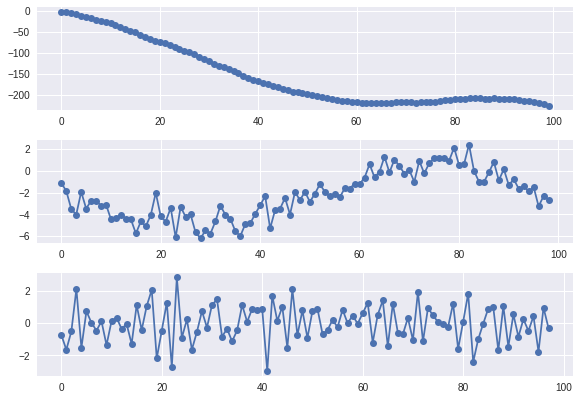

In [128]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [-1, 0.6])
y2 = p.generate_sample(100).cumsum().cumsum()  #  ARIMA d=2
y1 = np.diff(y2)
y0 = np.diff(y1)
plt.subplot(311); plt.plot(y2, 'o-');
plt.subplot(312); plt.plot(y1, 'o-');
plt.subplot(313); plt.plot(y0, 'o-');
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

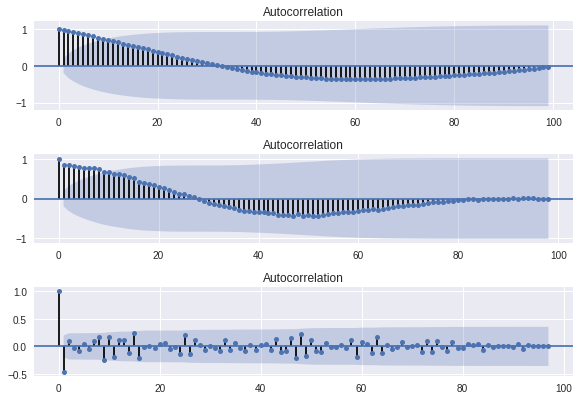

In [129]:
ax1 = plt.subplot(311); sm.tsa.graphics.plot_acf(y2, ax=ax1);
ax2 = plt.subplot(312); sm.tsa.graphics.plot_acf(y1, ax=ax2);
ax3 = plt.subplot(313); sm.tsa.graphics.plot_acf(y0, ax=ax3);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

In [130]:
y = p.generate_sample(100).cumsum

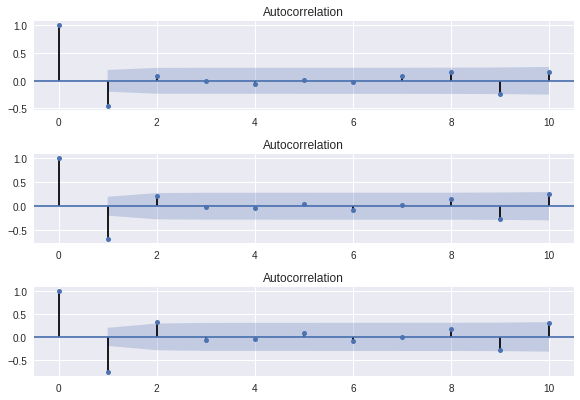

In [131]:
np.random.seed(0)
p = sm.tsa.ArmaProcess([1], [-1, 0.6])
y2 = p.generate_sample(100)
y1 = np.diff(y2)
y0 = np.diff(y1)
ax1 = plt.subplot(311); sm.tsa.graphics.plot_acf(y2, lags=10,  ax=ax1);
ax2 = plt.subplot(312); sm.tsa.graphics.plot_acf(y1, lags=10,  ax=ax2);
ax3 = plt.subplot(313); sm.tsa.graphics.plot_acf(y0, lags=10,  ax=ax3);
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

Stationary가 되면 차분을 더 해도 stationary

# Dickey-Fuller 단위근 검정

## DF 검정

Dickey-Fuller 단위근 검정(unit root test)은 ARIMA 모형의 적분 차수를 판단하기 위한 검정 방법의 하나이다.

**적분 차수가 1차인 경우가 귀무가설(null hypothesis)**이 되며 이 경우 특성 방정식의 해에 $x=1$ 즉 단위근(unit root)이 포함되기 때문에 단위근 검정이라고 한다.

DF 검정의 검정 통계량(test statistics)은 회귀분석의 결과로 나타나는 계수이다.

시계열 $Y_t$의 차분 $\nabla Y_t=Y_t - Y_{t-1}$를 종속변수로, 원 시계열 $Y_t$와 차분값의 지연 값들 $\nabla Y_{t-1}, \nabla Y_{t-2}, \cdots, \nabla Y_{t-k}$을 독립변수로 회귀 분석을 실시하고 그 결과로 나오는 $Y_t$의 계수값이 검정 통계량이 된다.

DF 검정의 원리는 다음과 같다.

만약 시계열 $Y_t$의 적분 차수가 1이면 다음 식에서 $a=0$이 된다. 

$$ Y_t = (a + 1) Y_{t-1} + X_t $$

이 식에서 $X_t$는 다음과 같이 표현 가능한 AR(p) 과정이다.

$$ X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + e_t $$

$a=0$ 성립하는 경우, 이 두 식을 정리하면 다음과 같다.

$$ \nabla Y_t = a Y_{t-1} + \phi_1 \nabla Y_{t-1} + \phi_2 \nabla Y_{t-2} + \cdots + \phi_p \nabla Y_{t-p} + e_t $$

따라서  $\nabla Y_t=Y_t - Y_{t-1}$를 종속변수로, 원 시계열 $Y_t$와 차분값의 지연 값들 $\nabla Y_{t-1}, \nabla Y_{t-2}, \cdots, \nabla Y_{t-k}$을 독립변수로 회귀 분석을 실시하여 $a$를 구할 수 있다. 이 $a$값이 검정 통계량이 되고 귀무가설이 성립하면 $a=0$이 된다.

DF 검정의 검정 통계량 $a$는 일반적인 검정과 달리 정규분포 등의 간단한 수식으로 나타나지 않고 미리 계산된 표를 사용하거나 근사식을 사용한다.

## ADF 검정

Augmented Dickey-Fuller (ADF) 검정은 1차 누적에 의한 확률적 추세뿐 아니라 2차항으로 나타나는 결정론적 추세를 포함하는 시계열에 대해서 단위 근 검정을 할 수 있도록 DF 검정을 일반화 한 것이다.

ADF 검정도 DF 검정과 마찬가지로 회귀 분석 결과로 나온 계수를 검정 통계량으로 사용하며 회귀 방정식은 다음과 같다.

$$ \nabla Y_t = \alpha + \beta t + \gamma Y_{t-1} + \phi_1 \nabla Y_{t-1} + \phi_2 \nabla Y_{t-2} + \cdots + \phi_p \nabla Y_{t-p} + e_t $$

이 식에석 $\gamma$값이 검정 통계량이며 귀무가설이 성립하는 경우 $\gamma=0$이다.

ADF 검정은 DF 검정을 포함하기 때문에 대부분의 통계 패키지는 ADF만을 지원한다.

작아서 리젝되면 stationary

## Python을 사용한 ADF 검정

statsmodels 패키지는 [`statsmodels.tsa.adfuller`](http://statsmodels.sourceforge.net/stable/generated/statsmodels.tsa.stattools.adfuller.html) 라는 ADF 검정 함수를 제공한다. 

입력 인수와 반환값은 다음과 같다.

* 입력 인수

  * x : 시계열 자료
  * maxlag : ADF 검정에 사용할 시차의 수. 디폴트 12*(nobs/100)^{1/4}
  * regression : 검정 사용할 모형. 
    * 'nc': 결정론적 추세 없음. DF 검정
    * 'c': 상수항만 사용
    * 'ct': 상수항과 1차 추세 사용
    * 'ctt': 상수항과 1차 추세, 2차 추세 사용
  *  autolag : 검정 AR 모형의 차수를 자동 결정하는 알고리즘 {‘AIC’, ‘BIC’, ‘t-stat’, None}


* 반환값

  * adf : 검정 통계량
  * pvalue : MacKinnon(1994) 방식을 사용한 p-value 추정치
  * usedlag : 사용된 시차의 수
  * nobs : 분석에 자료의 수
  * critical values : 1%, 5%, 10% 수준에 해당되는 검정 통계량의 값

실제로 시뮬레이션으로 생성된 시계열 자로에 대해 ADF 검정을 실시해 본다.

In [132]:
p = sm.tsa.ArmaProcess([1], [-1, 0.6])
y2 = p.generate_sample(100).cumsum().cumsum()  #  ARIMA d=2
y1 = np.diff(y2)
y0 = np.diff(y1)

In [133]:
sm.tsa.adfuller(y2)

(-1.1584350882862577,
 0.69121561221433681,
 2,
 97,
 {'1%': -3.4996365338407074,
  '10%': -2.5829283377617176,
  '5%': -2.8918307730370025},
 242.49511193458301)

In [134]:
sm.tsa.adfuller(y1)

(-3.0755844420573806,
 0.028413609388651888,
 1,
 97,
 {'1%': -3.4996365338407074,
  '10%': -2.5829283377617176,
  '5%': -2.8918307730370025},
 240.32444160634171)

In [135]:
sm.tsa.adfuller(y0)

(-10.078802608573342,
 1.203812457700242e-17,
 1,
 96,
 {'1%': -3.5003788874873405,
  '10%': -2.5830997960069446,
  '5%': -2.8921519665075235},
 241.09627686072338)

 위 분석에서 보듯이 적분 차수가 $d=2$, $d=1$인 시계열에 대해서는 97%, 78%의 p-value가 나왔다. 즉, 검정통계량이 0이고 적분 과정이라는 귀무가설이 맞다는 뜻이다. 

마지막 적분 차수가 $d=0$인 정상 과정에 대해서는 p-value가 0으로 정상 과정임을 나타낸다.

# 확률 과정 모형을 추정하는 방법

시계열 자료가 주어졌을 때 이 자료를 가장 잘 표현할 수 있는 확률 과정 모형을 만드는 법은 다음과 같은 과정을 거친다.

1. 정규성 확인

  * 정규성 검정을 통해 자료의 분포가 정규 분포인지 확인한다.
  * 가능하다면 로그 변환이나 Box-Cox 변환을 사용하여 정규 분포로 변환

2. 비정상 과정에서 정상 과정 추출

  * 결정론적 추세나 확률적 추세가 있는지 확인
  * 결정론적 추세는 회귀 분석 등으로 분리
  * 확률적 추세인 경우 ADF 검정 등으로 적분 차수를 확인하고 차분
  
3. 정상 과정에 대한 ARMA 모형 차수 결정

  * ACF/PACF 분석으로 AR(p) 모형 또는 MA(q) 모형 결정
  * ARMA 모형인 경우 모수 추정시 AIC/BIC 값을 이용하여 차수 결정
  
4. ARMA 모형의 모수 추정

  * MM/LS/MLE 등의 방법론으로 모수 추정
  * 부트스트래핑을 사용하여 모수의 표준 오차 추정
  
5. 모형 진단

  * 잔차에 대한 정규성 검정
  * 잔차에 대한 ACF 분석 또는 Ljung-Box Q 검정으로 모형 차수 재확인

## 정규성 확인

확률 과정 모형이 일반 선형 확률 과정인 경우에는 가우시안 백색 잡음이 이노베이션 과정으로 입력되고 전체 시계열은 이에 대한 지연 및 선형 조합으로 이루어지기 때문에 가우시안 정규 분포를 이룬다.

따라서 ARIMA 모형 등의 일반 선형 확률 과정으로 모형화하려면 우선 정규성 검정(normality test)을 사용하여 분포가 정규 분포인지를 확인해야 한다.

만약 시계열 자료의 분포가 로그 변환이나 Box-Cox 변환을 사용하여 정규성이 개선된다면 이러한 변환을 사용할 수 있다. 

[[school_notebook:3f485c426a4b49fc9de95a02137ca6b4]]

## 결정론적 추세 제거

다항식 등으로 모형화가 가능한 결정론적 추세가 있는 경우에는 회귀 분석으로 이를 분리할 수 있다.

[[school_notebook:240b62a8927043c79b5384536e42f99d]]

## 확률적 추세 제거

확률적 추세가 있는 경우, 즉 ARIMA 모형인 경우에는 적분 차수(order of integration)을 알아야 한다. 적분 차수를 파악하는 방법은 ACF 를 분석하거나 ADF(Augmented Dickey Fuller) 검정을 사용할 수 있다.

[[school_notebook:240b62a8927043c79b5384536e42f99d]]

## ARMA 모형의 차수 결정

ACF가 특정 차수 이상에서 없어지는 경우(cut-off)에는 MA 모형을 사용할 수 있다. 만약 PACF가 특정 차수 이상에서 없어지면 AR 모형을 사용한다. ACF와 PACF 모두 특정 차수 이상에서 없어지는 현상이 나타나지 않는다면 ARMA 모형을 사용해야 한다. ARMA 모형의 차수 결정은 AIC(Akaike Information Criterion) 등을 사용하여 모수 추정과 동시에 이루어진다.

[[school_notebook:ebb638fc880145b9adeef8dfa630f067]]

## ARMA 모형의 모수 추정

ARMA 모형의 차수가 결정되면 해당 수식에 대한 계수 즉 모수(parameter)의 값을 추정해야 한다. 이 때 다음과 같은 방법들을 사용할 수 있다.

* 모멘트 방법 (Method of Moment)
* 최소 자승 방법 (Least Square)
* 최대 우도 추정 방법 (Maximum Likelihood Estimation)

모수 추정시에는 모수에 대한 추정 오차도 같이 계산하여 모형 차수의 정당성을 재확인한다.

## 모형 진단

모형이 추정된 다음에는 진단(diagnosis) 과정을 통해 추정이 올바르게 이루어졌는지 검증한다. 

기본적으로 잔차(residual)가 백색 잡음이 되어야 하므로 잔차에 대해 다음을 조사한다.

* 잔차의 정규성 검정
* 잔차의 ACF 분석 혹은 Ljung-Box 검정

# 비정상 확률 과정을 정상 확률 과정으로 변환하기

비정상 확률 과정(nonstationary process)은 기댓값이나 분산이 시간에 따라 변화하는 확률 과정이다. 주로 기댓값 분산의 크기가 시간이 지남에 따라 커지는 경우가 많다. 이와 반대로 시간이 지나도 기댓값이 분산이 변하지 않는 확률 과정을 정상 확률 과정(stationary process)라고 한다. 정상 확률 과정과 비정상 확률 과정에 대해서는 다음 노트북을 참조한다.

[[school_notebook:0ddd47967585403ab8b4cb60d0e420f6]]

정상 확률 과정은 그 특성에 따라 AR 모형, MA 모형, ARMA 모형 등의 확률 과정 모형으로 모형화(modeling) 할 수 있다.

[[school_notebook:f1b89d145ef14bca8e5b6f1800985d52]]

[[school_notebook:64a96000aec2494a98d19bd7c26c616a]]

[[school_notebook:e880ecd416554dbf84db6a3e8f426b99]]

[[school_notebook:f4e9ec14b4d14261bdf4a24eeaefbab7]]

[[school_notebook:9cbbfed6d6f34f02a2cdaa422706be91]]

비정상 확률 과정의 경우에는 정상 과정으로 변환(transform)하여 모형화하는 것이 효율적이므로 다음과 같은 방법을 사용하여 정상 과정 변환을 하게 된다.

* 차분 (differencing)

* 백분율(percentage change) 혹은 로그(logarithm) 변환

* Box-Cox 변환

## 차분

다음 시계열 자료는 1986년부터 2006년까지의 월간 원유 가격 자료이다. Cryer & Chan (2008)의 자료를 참고하였다. 2001년 이후로 보이는 급격한 가격 상승을 고려할 때 이 시계열은 정상 확률 과정으로 보기 힘들다. 그렇지만 ARIMA 모형과 같은 확률적 추세(stochastic trend)를 가지는 비정상 모형은 이 시계열 자료의 특성을 비교적 잘 표현할 수 있다.

 [[school_notebook:51c4aa6bf4974889ae4b9cec29da16d6]]

## 로그 변환

비정상 확률 과정으로 모형화 할 수 있는 시계열 자료 중에서 표준편차가 자료의 크기에 비례하여 증가하는 경향을 보이거나 지수함수적으로 증가하는 경향을 보이는 경우에는 차분보다 로그 변환(logarithm transform)이 더 적당하다.

우선 표준 편차가 자료의 크기에 비례하는 경우를 살펴보자. 추세 함수 즉 기댓값이 시간에 따른 함수이고 표준 편차는 여기에 비례한다고 하자.

$$  \text{E}[Y_t] = \mu_t = f(t) $$


$$ \sqrt{\text{Var}[Y_t]} = \mu_t \sigma $$

로그 변환을 하면 다음과 같다.

$$ \log Y_t \approx \log \mu_t + \dfrac{Y_t - \mu_t}{\mu_t} $$


$$ \text{E}[\log Y_t] = \log \mu_t $$


$$ \text{Var}[\log Y_t] \approx \sigma^2 $$


즉 로그 변환한 결과로 나온 확률 과정의 분산은 일정하게 된다. 따라서 추세 제거를 통해 기댓값을 0으로 만들기만 하면 정상 과정으로 모형화 가능하다

경제 관련 분석에서 흔히 볼 수 있는 수익률 혹은 백분율 자료도 로그 변환과 관련이 있다.

확률 과정 $Y_t$에 대한 백분율 자료 $X_t$는 다음과 같이 정의된다.

$$ X_t = \dfrac{Y_{t}}{Y_{t-1}} - 1 $$

여기에서 

$$ \log{Y_t} - \log{Y_{t-1}} = \log{X_t + 1} \approx X_t \;\; \text{ if } \left| X_t \right| < 0.2 $$

이므로 백분률 이나 수익률 자료는 원 자료에 대해 로그 변환을 하고 이를 다시 차분한 것이라 볼 수 있다.

## Box-Cox 변환

Box-Cox 변환은 정규분포가 아닌 자료를 정규분포로 변환하기 위해 사용된다. 모수(parameter) $\lambda$를 가진다.

$$ 
y^{(\boldsymbol{\lambda})} =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\ln{y} & \text{if } \lambda = 0,
\end{cases} 
$$

보통 여러가지 $\lambda$ 값을 시도하여 가장 정규성을 높여주는 값을 찾아서 사용한다.

** 이부분은 교재페이지를 참고하자: https://datascienceschool.net/view-notebook/3f485c426a4b49fc9de95a02137ca6b4/**